#Overview of Spotify Regression Problem

* **Problem:** Build a machine learning model for song popularity on Spotify using 10 song-based variables.

* **Performance measure:** RMSE will be used to evaluate the performance of the regression models.

* **Process:** Start small before moving to complex methods backed by analysis. As each modelling phase reveals general techniqyes such as scaling, these are re-implemented from the beginning.

* **Results:** Stacking model using two decision tree ensembles and one SVR model(with an 'rbf' kernel) produced the lowested RMSE score of approximately 10.3. 

  
**NB** In order to run models, run sections **A** and **B** beforehand.



#**Run A** - Import data and load files

####Import Packages


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

####Read Data Files


In [11]:
spotify = pd.read_csv("CS98XRegressionTrain.csv", na_values=['NA'])
test = pd.read_csv("CS98XRegressionTest.csv", na_values=['NA'])

train_spotify = pd.read_csv("CS98XRegressionTrain.csv", na_values=['NA'])
test_spotify = pd.read_csv("CS98XRegressionTest.csv", na_values=['NA'])

#Data exploration



*   **Size:** Dataset has 11 numerical variables, 10 independent and 1 dependent (song popularity)
*   **Splitting:** Dataset is small with only 453 observations suggesting more sophisticated method might be useful for training models, especially for ensembles where multiple models are used
*   **Linearity:** A pair plot of the numeric variables reveals lack of linearity between the dependent variable and the independent variables
 *  This suggests linear relationships may have little predictive power
 *  A correlation matrix confirms the lack of linearity










In [ ]:
# Quick look at first five rows
train_spotify.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


The data fields include:

 - Id - an arbitrary unique track identifier
 - title - track title
 - artist - singer or band
 - top genre - genre of the track
 - year - year of release (or re-release)
 - bpm - beats per minute (tempo)
 - nrgy - energy: the higher the value the more energetic
 - dnce - danceability: the higher the value, the easier it is to dance to this song
 - dB - loudness (dB): the higher the value, the louder the song
 - live - liveness: the higher the value, the more likely the song is a live recording
 - val - valence: the higher the value, the more positive mood for the song
 - dur - duration: the length of the song
 - acous - acousticness: the higher the value the more acoustic the song is
 - spch - speechiness: the higher the value the more spoken word the song contains
 - pop - popularity: the higher the value the more popular the song is (and the target variable for this problem)

In [ ]:
# Overview of descriptive statistics
train_spotify.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [ ]:
# Information on features
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


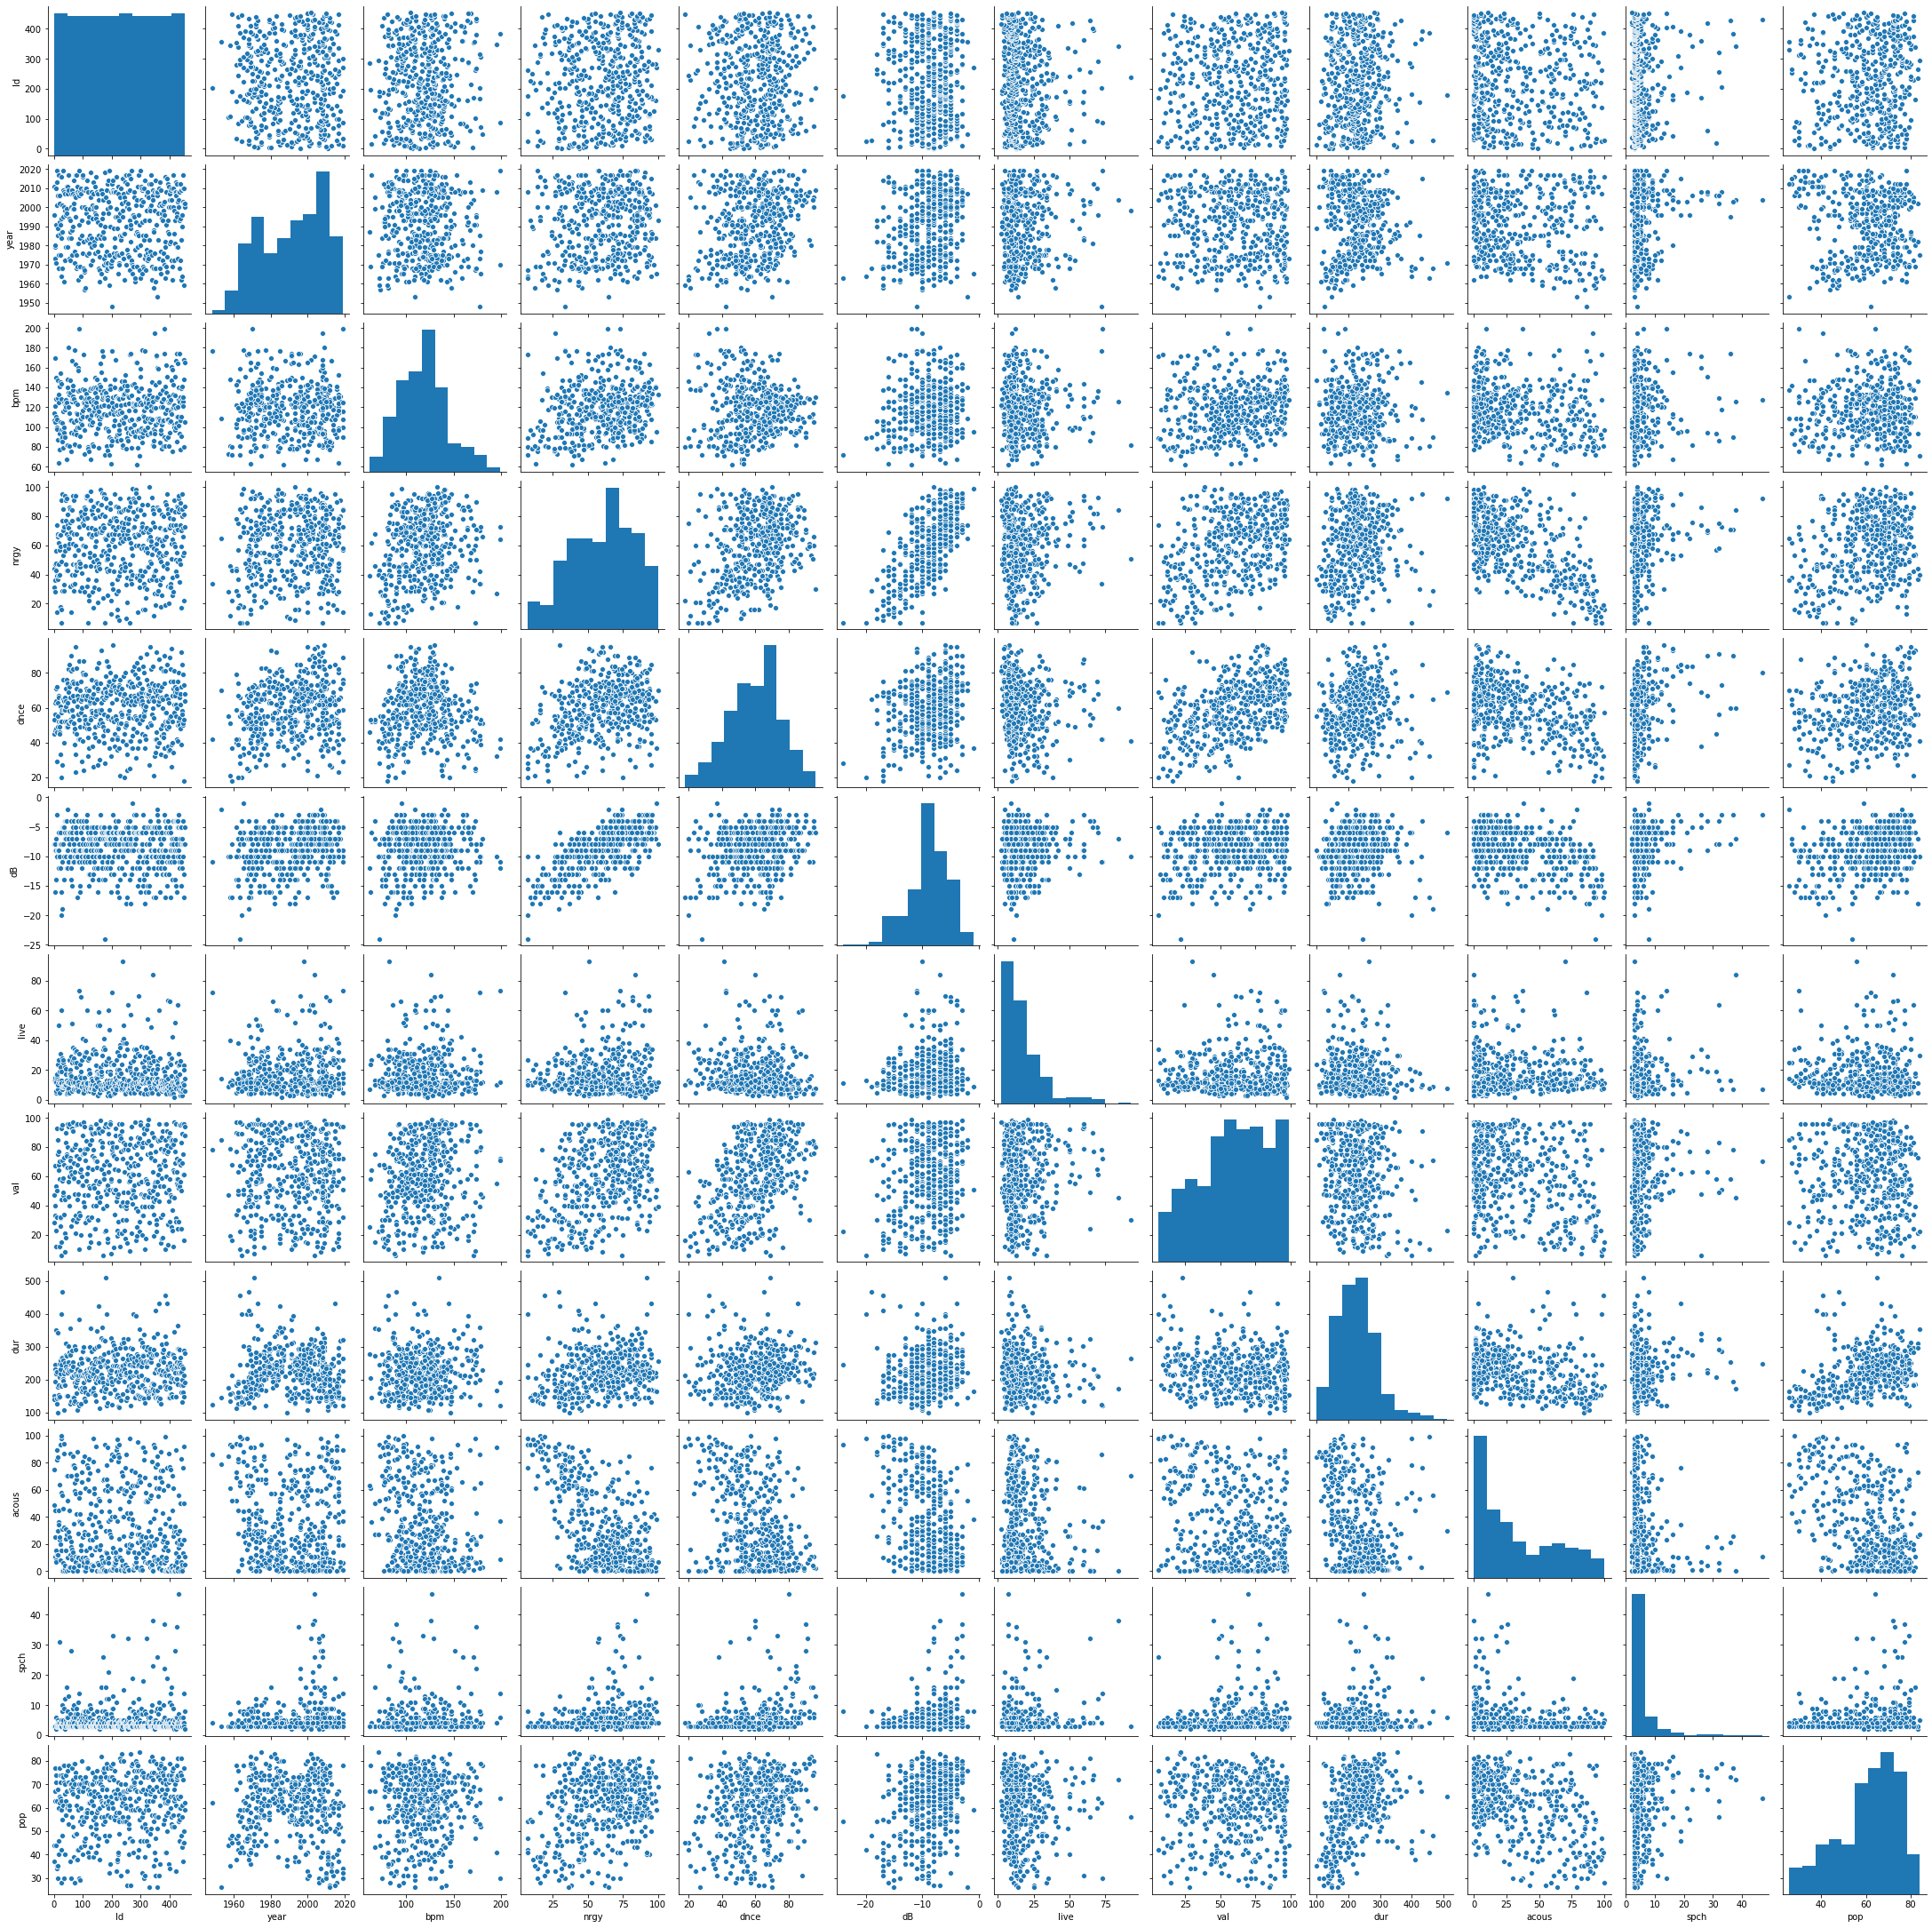

In [ ]:
# Pairplots of all variables
sb.pairplot(train_spotify.dropna())

In [ ]:
# Check for any linear correlations between all variables
corr_matrix = train_spotify.corr()
corr_matrix

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,1.000000,-0.027718,0.055114,0.043105,0.043052,-0.025988,-0.035120,0.042832,0.061114,-0.071105,0.084924,0.086837
year,-0.027718,1.000000,-0.039243,0.122396,0.224497,0.291471,-0.000011,-0.025627,-0.045699,-0.127588,0.186732,-0.054293
bpm,0.055114,-0.039243,1.000000,0.227551,-0.009167,0.103372,0.017632,0.152745,0.025603,-0.222571,0.051271,0.055024
nrgy,0.043105,0.122396,0.227551,1.000000,0.348121,0.683883,0.096633,0.422263,0.179608,-0.662268,0.205850,0.303797
dnce,0.043052,0.224497,-0.009167,0.348121,1.000000,0.254994,-0.084432,0.475557,0.115310,-0.396887,0.240809,0.258670
dB,-0.025988,0.291471,0.103372,0.683883,0.254994,1.000000,0.081476,0.158665,0.100780,-0.457386,0.229775,0.316854
live,-0.035120,-0.000011,0.017632,0.096633,-0.084432,0.081476,1.000000,0.070931,-0.105701,-0.023418,0.088667,-0.051364
val,0.042832,-0.025627,0.152745,0.422263,0.475557,0.158665,0.070931,1.000000,-0.146161,-0.254956,0.084586,-0.018713
dur,0.061114,-0.045699,0.025603,0.179608,0.115310,0.100780,-0.105701,-0.146161,1.000000,-0.284181,0.098079,0.363266
acous,-0.071105,-0.127588,-0.222571,-0.662268,-0.396887,-0.457386,-0.023418,-0.254956,-0.284181,1.000000,-0.208819,-0.465875


Most closely correlated to pop (in order) are:
 - acoustic with -0.466
 - duration with 0.363
 - dB with 0.317
 - enrgy with 0.304
 - dance with 0.259

#**Run B** - Data Processing

*   **Cross validation** was used for all models in this study due to the small size of the dataset and the unclear relationship between the independent and dependent variables
*   **Grid Search** was used for all models in order to find the optimal values for the hyperparameters. This was particular useful for Support Vector Regression models where many hyperparameters are available.
*   **Scaling** of the independent variables was decided during initial modelling phases which revealed mean RMSE of 14 for unscaled data versus 11 for scaled data.  










#### One-hot encoding top genre column

In [12]:
# Rename top genre to top_genre to make life easier
spotify.rename(columns={'top genre': 'top_genre'}, inplace=True)
train_spotify.rename(columns={'top genre': 'top_genre'}, inplace=True)
test_spotify.rename(columns={'top genre': 'top_genre'}, inplace=True)

# One-Hot Encoding of the top genre to see if improves predictive power (It did by a small margin)
music_cat = train_spotify[["top_genre"]]
pd.get_dummies(train_spotify, columns=["top_genre"], drop_first=True)

music_cat = test_spotify[["top_genre"]]
pd.get_dummies(test_spotify, columns=["top_genre"], drop_first=True)

# As trying to predict popularity, and top_genre is not a continuous label it can be dropped from the table
train_spotify.drop(['top_genre', 'artist','title'], axis=1, inplace=True)
test_spotify.drop(['top_genre', 'artist','title'], axis=1, inplace=True)

#### Assigning independent and dependent variables

In [13]:
# spotX is for all independent variables
# spoty is for the dependent variable ('pop')
spotX = train_spotify.drop('pop', axis=1)
spoty = train_spotify["pop"]

#### Scaling Data

In [14]:
# Scaling X as some of the columns have much wider ranges than the others
std_scaler = StandardScaler()
spotX_scaled = std_scaler.fit_transform(spotX)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())


# Prediction Models

## Linear Models

* **Overall:** Linear outperformed logistic with minor differences between scores for linear, lasso and ridge (~11 RMSE)
 * Lasso and Ridge are in the appendix
* **Feature selection:** A smaller set of variables with relatively higher correlation had a lower RMSE result than the complete set of features, favouring using the dataset in full
* **Logistic comparison:** Similar results were observed for the logistic reression regarding scaled vs. unscaled, and complete vs. selective feature selection



In [15]:
# Linear regression model
##########################

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(spotX_scaled,spoty)

# predictions
pred_reg = reg.predict(spotX_scaled)

spotify['linear_preds'] = pred_reg

scores = cross_val_score(reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
linear_rmse_scores = np.sqrt(-scores)

display_scores(linear_rmse_scores)

Scores: [12.37221139 11.3441271  10.84034352  9.04329615 11.06207914 13.64574808
 10.89390143 11.17464566 11.67228963  8.62981269]
Mean: 11.06784547849622
Standard Deviation: 1.3756777822434498


In [16]:
# Linear regression with fewer features
##########################

## these are: nrgy, dnce, dB, dur, acous
## but do not include nrgy as it has high correlation with dB (multicollinearity)

# Variable selection
LX = spotX[['dnce','dB','dur','acous']]
LX_scaled =std_scaler.fit_transform(LX)

reg = LinearRegression().fit(LX_scaled, spoty)

pred_reg = reg.predict(LX_scaled)

spotify['multi_linear_preds'] = pred_reg

scores = cross_val_score(reg, LX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
LX_rmse_scores = np.sqrt(-scores)

display_scores(LX_rmse_scores)

Scores: [12.59683175 11.4560207  10.25449729  9.68669985 11.58340331 13.3422542
 11.89319151 10.89536196 12.66001438  9.73045197]
Mean: 11.409872693864724
Standard Deviation: 1.198376239907046


**Logistic Regression Models - scaled vs. unscaled**

In [ ]:
# Logistic regression model
##########################

# Import package
from sklearn.linear_model import LogisticRegression

# Grid Search
param_grid = [
    {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'dual': (True, False), 'C': [1,10,100],
    'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
scaled_log_reg = LogisticRegression(C=1, dual=False, penalty='l2', solver='saga', max_iter=100)
scaled_log_reg.fit(spotX_scaled,spoty)

# Make predictions
scaled_prediction = scaled_log_reg.predict(spotX_scaled)
spotify['scaled_preds'] = scaled_prediction
scores = cross_val_score(scaled_log_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
scaled_log_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(scaled_log_rmse_scores)

In [ ]:
# Logistic regression model - unscaled data
##########################

# Grid search
param_grid = [
    {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'dual': (True, False), 'C': [1,10,100],
    'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model to unscaled data
log_reg = LogisticRegression(C=10, dual=False, penalty='l2', solver='saga')
log_reg.fit(spotX,spoty)

# Make predictions
unscaled_prediction = log_reg.predict(spotX)
spotify['unscaled_preds'] = unscaled_prediction
scores = cross_val_score(log_reg, spotX, spoty,
                        scoring="neg_mean_squared_error",cv=10)
unscaled_log_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(unscaled_log_rmse_scores)

## Decision Tree Models

* **Approach:** The ensemble method was used for this phase, specifically the Random Forest Regressor and the Extra Trees Regressor as it produces better predictions than utilising only one decision tree, especially due to the complex nature of the data
* **Results:** Both improved the RMSE by 1 unit (~10.3 RMSE) despite respectively different hyperparameters from Grid Search
 * This migh be due to decision tree models being more suited to non-linear data



In [20]:
# Random Forest
##########################

# Import package
from sklearn.ensemble import RandomForestRegressor
"""
# Grid Search
param_grid = [
    {'n_estimators': [1,10,100,1000], 'max_features': [2,4,6,8], 'max_leaf_nodes': [2,10,100,1000],
    'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)
"""
# Fit model
rnd_clf = RandomForestRegressor(bootstrap=True, max_depth=10, max_features=2, n_estimators=100, max_leaf_nodes=100, min_samples_split=2, n_jobs=-1)
rnd_clf.fit(spotX_scaled,spoty)

# Make predictions
rf_scaled_prediction = rnd_clf.predict(spotX_scaled)
scores = cross_val_score(rnd_clf, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
rnd_clf_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(rnd_clf_rmse_scores)

Scores: [11.58704441 10.21005027  9.21121147  9.74125631 10.47191891 11.61114283
 10.34986836 10.57900486 11.18181205  9.48372338]
Mean: 10.442703284796224
Standard Deviation: 0.7893965524843206


In [21]:
# Extra Trees
##########################

# Import package
from sklearn.ensemble import ExtraTreesRegressor
"""
# Grid Search
param_grid = [
    {'n_estimators': [1,10,100,1000], 'max_features': [2,4,6,8], 'max_leaf_nodes': [2,10,100,1000],
    'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
]
et_clf = ExtraTreesRegressor()
grid_search = GridSearchCV(et_clf, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)
"""
# Fit model
et_clf = ExtraTreesRegressor(max_features=6, n_estimators=100, max_leaf_nodes=1000, n_jobs=-1)
et_clf.fit(spotX_scaled,spoty)

# Make predictions
et_scaled_prediction = et_clf.predict(spotX_scaled)
scores = cross_val_score(et_clf, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
et_clf_rmse_scores = np.sqrt(-scores)

# Print Scores
display_scores(et_clf_rmse_scores)


Scores: [10.4961903   9.64997871  9.4638223   9.28015242 10.39667821 11.23145929
 10.2015928  10.54366592 11.40182373  9.53699137]
Mean: 10.220235505914182
Standard Deviation: 0.6984908478431593


## Support Vector Machine Models - Linear and Non-Linear

* **Approach:** We implemented a variety of Support Vector Regressions due to their ability to handle non-linearity better than basic linear regression by using a certain threshold for tolerating smaller errors
* **Results:** Grid Search correctly found Rbf kernel to have the lowest RMSE out of all SVR models (~10.6 RMSE) but no apparent improvement on the decision tree models

In [ ]:
# Linear SVR
##########################

# Import packages
from sklearn.svm import LinearSVR
"""
# Grid Search
param_grid = [
    {'epsilon': [0,1,100], 'C': [1,10,100]}
]
svm_reg = LinearSVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=10, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)
"""
# Fit model
svm_reg = LinearSVR(epsilon=1.0, C=10)
svm_reg.fit(spotX_scaled,spoty)

# Make predictions
svm_scaled_prediction = svm_reg.predict(spotX_scaled)
spotify['Linear_SVR_scaled_preds'] = svm_scaled_prediction
scores = cross_val_score(svm_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(svm_reg_rmse_scores)

In [ ]:
# Non-linear SVR Poly kernel
##########################

# Import package
from sklearn.svm import SVR
"""
# Grid Search
param_grid = [
  {'C': [1, 10, 100],'degree': [1, 2, 3, 4, 5], 'gamma': ('scale', 'auto'), 'coef0': [1,10], 'kernel': ['poly']},
 ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)
"""
# Fit model
svm_reg = SVR(kernel="poly", C=1, degree=2, gamma='scale')
svm_reg.fit(spotX_scaled,spoty)

# Make predictions
svm_scaled_prediction = svm_reg.predict(spotX_scaled)
spotify['SVM_scaled_preds'] = svm_scaled_prediction
scores = cross_val_score(svm_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(svm_reg_rmse_scores)

{'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
# Non-linear SVR rbf kernel
##########################

# Import package
from sklearn.svm import SVR

# Grid Search
param_grid = [
  {'C': [1, 10, 100],'epsilon': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
svm_reg = SVR(kernel="rbf", C=10, epsilon=1.0, gamma=0.1)
svm_reg.fit(spotX_scaled,spoty)

# Make predictions
svm_scaled_prediction = svm_reg.predict(spotX_scaled)
spotify['SVM_scaled_preds'] = svm_scaled_prediction
scores = cross_val_score(svm_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(svm_reg_rmse_scores)

{'C': 100, 'epsilon': 10, 'gamma': 0.001, 'kernel': 'rbf'}

**Summary of results:**
 - Extra Trees Ensemble Model (10.28)
 - Random Forest Model (10.36)
 - K-nearest Neighbors Model (10.54)
 - rbf SVM Model (10.58)
 - Lasso Linear Model (11.06)
 - Linear Model (11.07)
 - Linear SVR Model (11.31)



## Ensemble Models

* Ensembles were used in order to fit the data using multiple regressors
* Stacking regressor delivered the lowest score (~10.3 RMSE), similar to the ExtraTreesRegressor
* Stacking ensemble used the two previously fitted decision tree ensembles and the SVR using the rbf kernel
 * The meta learner was a linear regression
* Voting regressor close behind (10.4 RMSE), with bagging regressor having the higher score (11.4 RMSE)


In [ ]:
# Voting Ensemble
##########################

# Import package
from sklearn.ensemble import VotingRegressor

# Fit models
reg1 = ExtraTreesRegressor(max_features=6, n_estimators=900, max_leaf_nodes=150, n_jobs=-1)
reg2 = RandomForestRegressor(bootstrap=True, max_features=4, n_estimators=2000, max_leaf_nodes=1000, n_jobs=-1)
reg3 = SVR(kernel="rbf", C=10, epsilon=1.0)
ereg = VotingRegressor(estimators=[('ExtraTrees', reg1), ('RandomForest', reg2), ('SVR', reg3)])
ereg = ereg.fit(spotX_scaled,spoty)

# Make predictions
ereg_scaled_prediction = ereg.predict(spotX_scaled)
spotify['ereg_scaled_preds'] = ereg_scaled_prediction
scores = cross_val_score(ereg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
ereg_rmse_scores = np.sqrt(-scores)

# Print Scores
display_scores(ereg_rmse_scores)

Scores: [10.9068507   9.83949106  9.55889297  9.41214574 10.36904421 11.42990995
  9.66324471 10.88136302 11.09988519  9.15077638]
Mean: 10.231160393244396
Standard Deviation: 0.7652389979274409


In [ ]:
# Bagging Ensemble
##########################

# Import package
from sklearn.ensemble import BaggingRegressor

# Grid Search
param_grid = [
    {'n_estimators': [1,10,100,1000],'max_samples': [1,10,100],
    'max_features': [1,10,100],'bootstrap':[True,False]}
]
br_clf = BaggingRegressor(base_estimator=None)
grid_search = GridSearchCV(br_clf, param_grid, cv=10, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)


# Fit model
bag_clf = BaggingRegressor(base_estimator=KNeighborsRegressor(), bootstrap=False, max_features=10, max_samples=10, n_estimators=2000)
bag_clf = bag_clf.fit(spotX_scaled,spoty)

# Make predictions
bag_clf_scaled_prediction = bag_clf.predict(spotX_scaled)
spotify['bag_clf_scaled_preds'] = bag_clf_scaled_prediction
scores = cross_val_score(bag_clf, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
bag_clf_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(bag_clf_rmse_scores)  

In [ ]:
# Stacking Ensemble 
##########################

# Import Package
from sklearn.ensemble import StackingRegressor

# Define the base models
estimators = [
    ('etr', ExtraTreesRegressor(max_features=6, n_estimators=900, max_leaf_nodes=150, n_jobs=-1)),
    ('rfr', RandomForestRegressor(bootstrap=True, max_features=4, n_estimators=2000, max_leaf_nodes=1000, n_jobs=-1)),
    ('svr', SVR(kernel="rbf", C=10, epsilon=1.0))
]

# Define meta learner model
final_estimator = LinearRegression()

# Fit model
stack = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5)
stack = stack.fit(spotX_scaled,spoty)

# Make predictions
stack_scaled_prediction = cross_val_predict(stack, spotX_scaled, spoty, cv=10)
spotify['stack_scaled_preds'] = stack_scaled_prediction
scores = cross_val_score(stack, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
stack_rmse_scores = np.sqrt(-scores)

# Print scores and dataframe
display_scores(stack_rmse_scores)
spotify

Scores: [10.64624601  9.53769481  9.60914669  9.60356737 10.5985602  11.29870947
  9.81914397 10.96626482 11.17634328  9.11034381]
Mean: 10.236602043646451
Standard Deviation: 0.7461935873279427


,Id,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,...,unscaled_preds,Linear_SVR_scaled_preds,SVM_scaled_preds,knr_scaled_preds,rnr_scaled_preds,gb_scaled_preds,ereg_scaled_preds,bag_clf_scaled_preds,abr_clf_scaled_preds,stack_scaled_preds
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,...,30,49.688082,49.818377,44.0,44.0,48.723404,46.805805,57.7914,48.411765,51.124709
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,...,30,50.358061,44.802550,37.0,37.0,37.441176,40.035011,58.8116,39.565476,40.710109
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,...,70,67.862087,65.509135,77.0,77.0,68.808081,70.277967,62.3092,66.373134,66.387869
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,...,71,58.287176,65.999767,67.0,67.0,65.314103,66.065849,59.7021,62.212121,62.176640
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,...,70,61.212646,61.202846,63.0,63.0,61.337662,61.749633,60.5643,59.358333,60.267424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,...,41,47.814333,45.999950,45.0,45.0,49.000000,45.914355,57.8873,51.969925,49.118744
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,...,72,42.285213,46.615750,50.0,50.0,37.441176,47.829219,60.0184,46.718750,47.496468
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,...,73,69.697101,66.614736,77.0,77.0,65.314103,70.582544,64.5908,67.126316,65.212784
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,...,64,63.622215,65.711965,62.0,62.0,65.314103,64.635191,63.6721,65.476821,69.005251


# Comparison of Regression Model Predictions

**Conclusion**

As illustrated by the diagram below, the stacking regressor is the best performing model across all the training samples. We therefore choose the create our predictions using this model over the ExtraTreesRegressor (the next best model)

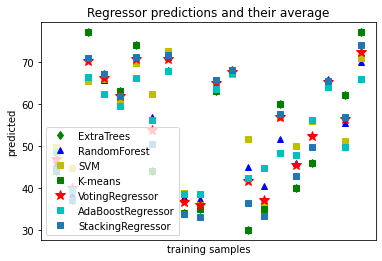

In [ ]:
# Visualise average predictions of best models
xt = spotX_scaled[:20]

pred1 = et_clf.predict(xt)
pred2 = rnd_clf.predict(xt)
pred3 = svm_reg.predict(xt)
pred4 = knr.predict(xt)
pred5 = ereg.predict(xt)
pred6 = abr_clf.predict(xt)
pred7 = stack.predict(xt)

plt.plot(pred1, 'gd', label='ExtraTrees')
plt.plot(pred2, 'b^', label='RandomForest')
plt.plot(pred3, 'ys', label='SVM')
plt.plot(pred4, 'gs', label='K-means')
plt.plot(pred5, 'r*', ms=10, label='VotingRegressor')
plt.plot(pred6, 'cs', label='AdaBoostRegressor')
plt.plot(pred7, 's', label='StackingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [ ]:
#spotify[["pop","scaled_preds","unscaled_preds","Linear_SVR_scaled_preds","Poly_SVR_scaled_preds","gb_scaled_preds","ereg_scaled_preds"]].head(20)
spotify.iloc[15:25]

,Id,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,...,unscaled_preds,Linear_SVR_scaled_preds,SVM_scaled_preds,knr_scaled_preds,rnr_scaled_preds,gb_scaled_preds,ereg_scaled_preds,bag_clf_scaled_preds,abr_clf_scaled_preds,stack_scaled_preds
15,16,Cry Like a Baby,The Box Tops,brill building pop,1968,133,47,67,-12,50,...,30,57.733665,50.007918,40.0,40.0,48.723404,45.390669,59.9351,47.804348,49.961735
16,17,One of These Days,Emmylou Harris,country rock,1975,125,39,66,-9,12,...,70,59.789252,55.897349,46.0,46.0,61.337662,52.310073,60.4810,56.148148,59.166860
17,18,"Beauty and the Beast - from the Soundtrack ""Be...",CÃ©line Dion,canadian pop,1992,77,40,46,-10,13,...,67,57.263991,64.590908,65.0,65.0,61.337662,65.090780,59.2969,64.000000,64.463366
18,19,Heart Full of Soul,The Yardbirds,album rock,2002,141,67,49,-10,5,...,30,50.447578,51.208491,62.0,62.0,60.750000,56.276702,60.6690,49.655556,50.210099
19,20,So Sick,Ne-Yo,dance pop,2006,93,57,45,-8,19,...,70,57.147841,70.766631,77.0,77.0,68.808081,72.404421,61.5179,65.854478,63.580162
20,21,Love Of My Life - Remastered 2011,Queen,glam rock,1975,154,18,33,-12,12,...,67,47.790749,61.098158,74.0,74.0,61.337662,66.979232,57.3959,65.010870,55.571209
21,22,Glory of Love,Peter Cetera,adult standards,1986,145,59,52,-8,31,...,71,67.761582,69.999748,71.0,71.0,65.314103,69.670202,63.1853,68.838384,67.975985
22,23,Fading Like a Flower (Every Time You Leave),Roxette,europop,1991,105,67,61,-6,22,...,70,67.100474,65.265603,64.0,64.0,68.808081,65.443306,63.1179,68.394265,66.017394
23,24,Stay Another Day,East 17,boy band,1994,128,49,52,-8,19,...,71,57.505644,67.174358,63.0,63.0,61.337662,65.238141,61.0781,61.333333,65.174385
24,25,Black Christ of the Andes (St. Martin de Porres),Mary Lou Williams,bebop,1964,89,7,20,-20,13,...,67,51.687849,48.743061,42.0,42.0,49.000000,45.796059,58.5526,51.687500,48.581542


# Processing for Kaggle Submission

In [ ]:
# Assign popularity predictions as a feature
testX_scaled = std_scaler.fit_transform(test_spotify)


pred1 = et_clf.predict(xt)
pred2 = rnd_clf.predict(xt)
pred3 = svm_reg.predict(xt)
pred4 = knr.predict(xt)
pred5 = ereg.predict(xt)
pred6 = abr_clf.predict(xt)
pred7 = stack.predict(xt)


test_et_prediction = et_clf.predict(testX_scaled) # Extra Tress
test_rnd_prediction = rnd_clf.predict(testX_scaled) # Random Forest
test_svm_reg_prediction = svm_reg.predict(spotX_scaled) # rbf SVM
test_knr_prediction = knr.predict(spotX_scaled) # K-means
test_ereg_prediction = ereg.predict(testX_scaled) # voting regressor
test_ada_prediction = abr_clf.predict(testX_scaled) # AdaBoost Regressor
stack_prediction = stack.predict(testX_scaled) # Stacking Regressor

test['pop'] = stack_prediction

In [ ]:
# Assign ID as a feature
test["pop"] = test["pop"].round(0).astype(int) 
test = test[["Id","pop"]]
test.head()

,Id,pop
0,454,65
1,455,67
2,456,57
3,457,61
4,458,49


In [ ]:
# Inspect newly created dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      114 non-null    int64
 1   pop     114 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 1.5 KB


In [ ]:
# Export predictions as a csv file
test.to_csv('predictions.csv', index=False)

**End of report**

# Appendix: Extra models

In [ ]:
# Lasso Linear 
##########################

# Import package
from sklearn.linear_model import Lasso

# Grid Search
param_grid = [
    {'alpha': [0.1,1,10], 'selection':('cyclic', 'random')}
]
lasso_reg = Lasso()
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
lasso_reg = Lasso(alpha=0.1, selection='random')
lasso_reg.fit(spotX_scaled,spoty)

# Make predictions
pred_reg = lasso_reg.predict(spotX_scaled)
spotify['linear_preds'] = pred_reg

# Print scores
scores = cross_val_score(lasso_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
lasso_rmse_scores = np.sqrt(-scores)
display_scores(lasso_rmse_scores)

Grid Search best parameters:  {'alpha': 0.1, 'selection': 'random'}
Scores: [12.36059105 11.37820929 10.68631239  8.98947164 11.00527409 13.54653729
 10.97589028 11.1261386  11.8045642   8.73076152]
Mean: 11.060375034440694
Standard Deviation: 1.35633926603296


In [ ]:
# Ridge Linear model
##########################

# Import package
from sklearn.linear_model import Ridge

# Grid search
param_grid = [
    {'alpha': [0.1,1,10], 'solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')}
]
ridge_reg = Ridge().fit(spotX_scaled,spoty)
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, 
                    scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
ridge_reg = Ridge(alpha = 10, solver = 'saga')
ridge_reg.fit(spotX_scaled,spoty)

# Make predictions
pred_reg = ridge_reg.predict(spotX_scaled)
spotify['linear_preds'] = pred_reg
scores = cross_val_score(ridge_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
ridge_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(ridge_rmse_scores)

Grid Search best parameters:  {'alpha': 10, 'solver': 'sparse_cg'}
Scores: [12.36319683 11.34925963 10.71704659  9.00742894 11.02399412 13.58266936
 10.94346542 11.16774838 11.71826602  8.68928254]
Mean: 11.056235782415634
Standard Deviation: 1.3622216789298887


In [ ]:
# ElasticNet Linear model
##########################

# Import package
from sklearn.linear_model import ElasticNet

# Grid Search
param_grid = [
    {'alpha': [0.1,1,10], 'l1_ratio':[0.1,1,10]}
]

en_reg = ElasticNet()
grid_search = GridSearchCV(en_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
en_reg = ElasticNet(alpha=0.1, l1_ratio=0.1).fit(spotX_scaled,spoty)

# Make predictions
pred_reg = en_reg.predict(spotX_scaled)
spotify['linear_preds'] = pred_reg

# Print scores
scores = cross_val_score(en_reg, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
en_rmse_scores = np.sqrt(-scores)
display_scores(en_rmse_scores)

Grid Search best parameters:  {'alpha': 0.1, 'l1_ratio': 0.1}
Scores: [12.36095387 11.37545766 10.48296931  8.96728881 10.96638395 13.46381259
 11.07039686 11.19377604 11.81310124  8.86163105]
Mean: 11.05557713887342
Standard Deviation: 1.3307619631183079


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 6.12549640883978
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 7.061104143646411
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 6.537732872928174
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 6.237618732782369
  positive)
/usr/loca

In [ ]:
# KNearest Neighbours
##########################
## Comments: 
## Good performance on its own, but it reduced when it was added to an ensemble

# Import package
from sklearn.neighbors import KNeighborsRegressor

# Grid search
param_grid = [
    {'weights': ('uniform','distance'),'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),'leaf_size': [1,10,100],
     'n_neighbors': [1,10,100],'p': [1,10,100]}
]
knr = KNeighborsRegressor()
grid_search = GridSearchCV(knr, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
knr = KNeighborsRegressor(algorithm='auto', leaf_size=2, n_neighbors=10, p=1, weights='distance')
knr.fit(spotX_scaled,spoty)

# Make predictions
knr_scaled_prediction = knr.predict(spotX_scaled)
spotify['knr_scaled_preds'] = knr_scaled_prediction
scores = cross_val_score(knr, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
knr_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(knr_rmse_scores)

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [ ]:
# Radius Neighbours
##########################

# Import pacakge
from sklearn.neighbors import RadiusNeighborsRegressor

# Grid Search
param_grid = [
    {'weights': ('uniform','distance'),'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),'leaf_size': [1,10,100],
     'radius': [1,10,100],'p': [1,10,100]}
]
rnr = RadiusNeighborsRegressor()
grid_search = GridSearchCV(rnr, param_grid, cv=10, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
rnr = RadiusNeighborsRegressor(algorithm='auto', leaf_size=1, radius=100, p=1, weights='distance')
rnr.fit(spotX_scaled,spoty)

# Make predictions
rnr_scaled_prediction = rnr.predict(spotX_scaled)
spotify['rnr_scaled_preds'] = rnr_scaled_prediction
scores = cross_val_score(rnr, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
rnr_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(rnr_rmse_scores)

{'algorithm': 'auto',
 'leaf_size': 1,
 'p': 1,
 'radius': 100,
 'weights': 'distance'}

In [ ]:
# AdaBoost Ensemble
##########################

# Import package
from sklearn.ensemble import AdaBoostRegressor

# Grid search
param_grid = [
    {'n_estimators': [1,10,100,1000], 'learning_rate': [1,10,100],
    'loss': ('linear', 'square', 'exponential')}
]
abr_clf = AdaBoostRegressor()
grid_search = GridSearchCV(abr_clf, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
abr_clf = AdaBoostRegressor(base_estimator = None, n_estimators=500, learning_rate=4.0, loss='exponential')
abr_clf = abr_clf.fit(spotX_scaled,spoty)

# Make predictions
abr_clf_scaled_prediction = abr_clf.predict(spotX_scaled)
spotify['abr_clf_scaled_preds'] = abr_clf_scaled_prediction
scores = cross_val_score(abr_clf, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
abr_clf_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(abr_clf_rmse_scores)

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 100}

In [ ]:
# Gradient Boosting
##########################

# Import package
from sklearn.ensemble import GradientBoostingRegressor

# Grid Search
param_grid = [
    {'loss': ('ls','lad','huber','quantile'),'max_depth': [1,10,100], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10],
     'n_estimators': [1,10,100],'learning_rate': [1,10], 'subsample':[0.1,0.3,0.5,0.7,1.0]}
]
gbrt = GradientBoostingRegressor()
grid_search = GridSearchCV(gbrt, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(spotX_scaled,spoty)
print("Grid Search best parameters: ", grid_search.best_params_)

# Fit model
gbrt = GradientBoostingRegressor(loss='ls', max_depth=3, n_estimators=1, learning_rate=1,
                                min_samples_split=10, subsample=1)
gbrt.fit(spotX_scaled,spoty)

# Make predictions
gb_scaled_prediction = gbrt.predict(spotX_scaled)
spotify['gb_scaled_preds'] = gb_scaled_prediction
scores = cross_val_score(gbrt, spotX_scaled, spoty,
                        scoring="neg_mean_squared_error",cv=10)
gbrt_rmse_scores = np.sqrt(-scores)

# Print scores
display_scores(gbrt_rmse_scores)

C:\Users\elija\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


{'learning_rate': 1,
 'loss': 'ls',
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 1,
 'subsample': 1.0}